In [859]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score

In [860]:
raw_data = pd.read_csv('train_s3TEQDk.csv')

In [861]:
raw_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# Data Preprocessing

In [862]:
raw_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [863]:
q1 = raw_data['Vintage'].quantile(0.99)
q2 = raw_data['Avg_Account_Balance'].quantile(0.99)

df = raw_data[raw_data['Vintage']<q1]
raw_data = df[df['Avg_Account_Balance']<q2]

##### removing the outliers

In [864]:
raw_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,240751.000000,240751.000000,2.407510e+05,240751.000000
mean,43.639246,46.032461,1.075533e+06,0.235933
std,14.750024,31.428285,6.924568e+05,0.424581
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.000550e+05,0.000000
50%,43.000000,32.000000,8.848910e+05,0.000000
75%,53.000000,73.000000,1.339467e+06,0.000000
max,85.000000,122.000000,4.471858e+06,1.000000


In [865]:
preprocessed_data = raw_data[['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead']]

In [866]:
preprocessed_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,240751.000000,240751.000000,2.407510e+05,240751.000000
mean,43.639246,46.032461,1.075533e+06,0.235933
std,14.750024,31.428285,6.924568e+05,0.424581
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.000550e+05,0.000000
50%,43.000000,32.000000,8.848910e+05,0.000000
75%,53.000000,73.000000,1.339467e+06,0.000000
max,85.000000,122.000000,4.471858e+06,1.000000


In [867]:
preprocessed_data.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         28565
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [868]:
preprocessed_data = preprocessed_data.drop(columns=['ID'],axis=1)

In [869]:
preprocessed_data = preprocessed_data.fillna(value='zan',axis=0)
np.unique(preprocessed_data['Credit_Product'],return_counts=True)

(array(['No', 'Yes', 'zan'], dtype=object), array([141944,  70242,  28565]))

##### filling missing value

# Data Visualization

In [870]:
preprocessed_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### Is_Lead

<AxesSubplot:xlabel='Is_Lead', ylabel='Count'>

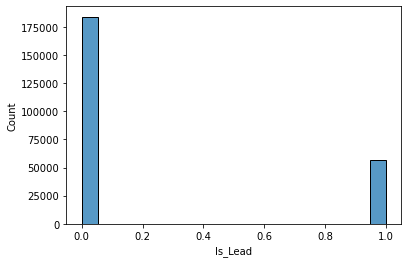

In [871]:
sns.histplot(preprocessed_data['Is_Lead'])

##### We can see that the data is not Balanced

In [872]:
np.unique(preprocessed_data['Is_Lead'],return_counts=True)

(array([0, 1]), array([183950,  56801]))

In [873]:
counts = np.unique(preprocessed_data['Is_Lead'],return_counts=True)
preprocessed_data = preprocessed_data.sort_values(by='Is_Lead',ascending=False)
preprocessed_data = preprocessed_data[:200000]

<AxesSubplot:xlabel='Is_Lead', ylabel='Count'>

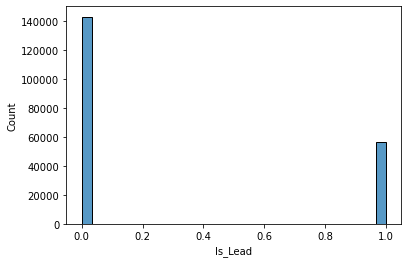

In [874]:
sns.histplot(preprocessed_data['Is_Lead'])

##### Now we can see the Dataset is balanced

### Gender

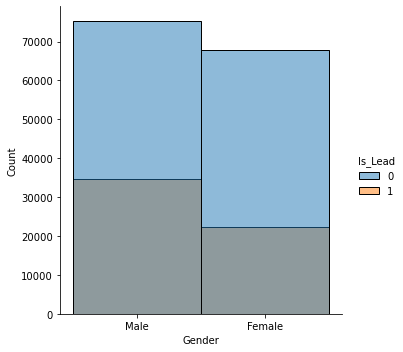

In [875]:
sns.displot(data=preprocessed_data, x='Gender', hue='Is_Lead')

##### Here we can see we have more numbers of males in the dataset. And males are more interested in credit card.

### Age

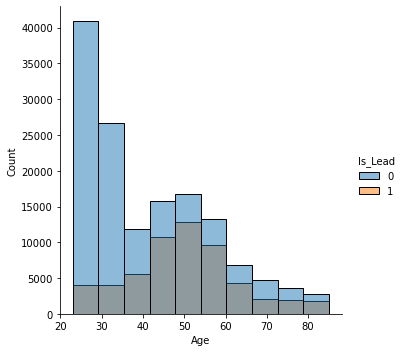

In [876]:
sns.displot(data=preprocessed_data, x='Age', hue='Is_Lead', bins=10)

##### Now here we can se that people with higher age group are more interested in credit card. Maybe because higher age group people are more stable in there job and they are more responsible due to which they can handle credit card so they are more interested. And there is another aspect also that younger people don't have much expenditure wrt older people so that can also be the reason why older people are more interested in credit card.

In [877]:
print("Age\t percentage of 1 per category",'\n')
list1 = preprocessed_data['Age'].unique()
list1.sort()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['Age']==i])
    y = len(preprocessed_data[(preprocessed_data['Age']==i) & (preprocessed_data['Is_Lead']==1)])
    print(i,"->\t",y*100/x)

Age	 percentage of 1 per category 

23 ->	 0.0
24 ->	 7.477906186267845
25 ->	 8.750899064972428
26 ->	 8.27078317518765
27 ->	 7.98828125
28 ->	 8.991113434396237
29 ->	 10.084033613445378
30 ->	 9.830940250115795
31 ->	 10.066006600660065
32 ->	 11.901865369018653
33 ->	 14.682539682539682
34 ->	 18.94070236039148
35 ->	 23.75
36 ->	 28.153310104529616
37 ->	 29.4054441260745
38 ->	 31.834532374100718
39 ->	 33.3454018826937
40 ->	 33.59535201640465
41 ->	 34.60346964064436
42 ->	 39.001426533523535
43 ->	 39.03771131339402
44 ->	 39.035508637236084
45 ->	 40.29380902413431
46 ->	 41.87930336168489
47 ->	 42.73632775794024
48 ->	 43.430178069353325
49 ->	 43.10247216455935
50 ->	 43.60636417206835
51 ->	 44.074593944255064
52 ->	 42.74908147827966
53 ->	 42.70687237026648
54 ->	 43.51087771942986
55 ->	 42.43331518780621
56 ->	 40.98073555166375
57 ->	 41.579419682919536
58 ->	 42.40650406504065
59 ->	 42.049092849519745
60 ->	 41.50647312671636
61 ->	 40.97872340425532
62 ->	 41.212

##### We can see people in age group 5, 6 have most interest in Credit card, while people in age group 1, 2 have least interest.

### Region_Code

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

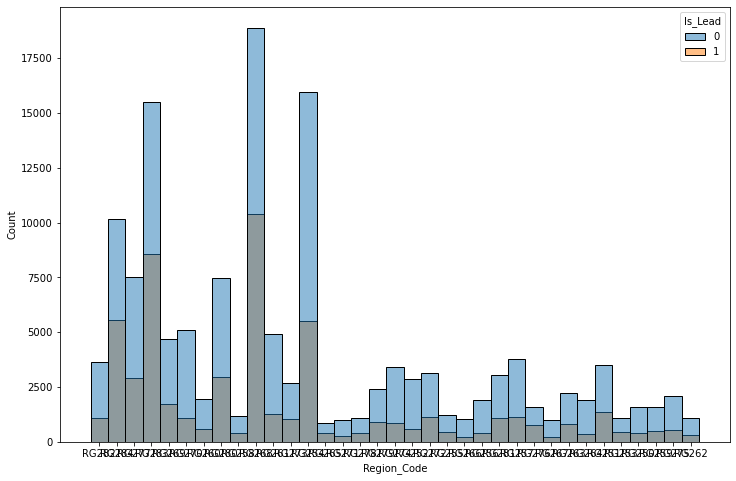

In [878]:
plt.figure(figsize=(12,8))
sns.histplot(data=preprocessed_data, x='Region_Code', hue='Is_Lead')

##### We can people from some particular region are more interested in Credit cards than other

### Occupation

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

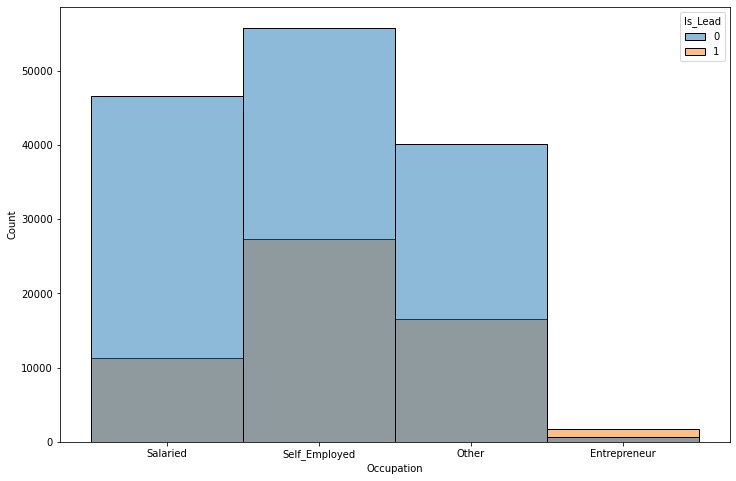

In [879]:
plt.figure(figsize=(12,8))
sns.histplot(data=preprocessed_data, x='Occupation', hue='Is_Lead')

##### Here we can clearly see Enterpreneur and Self_Employed are more interested in credit card while Salaried people are least. As we know while doing any kind of bussiness we may need to put money in our bussiness due to which we may remain with less balance for personal use especially when starting new bussiness. Maybe due to this Entrepreneur and self_employed people are more interested in credit card.

In [880]:
print("Age\t percentage of 1 per category",'\n')
list1 = preprocessed_data['Occupation'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['Occupation']==i])
    y = len(preprocessed_data[(preprocessed_data['Occupation']==i) & (preprocessed_data['Is_Lead']==1)])
    print(i,"->\t",y*100/x)

Age	 percentage of 1 per category 

Salaried ->	 19.414153633457186
Self_Employed ->	 32.86459023104059
Other ->	 29.213047083105472
Entrepreneur ->	 71.57806613645877


### Channel_Code

<AxesSubplot:xlabel='Channel_Code', ylabel='Count'>

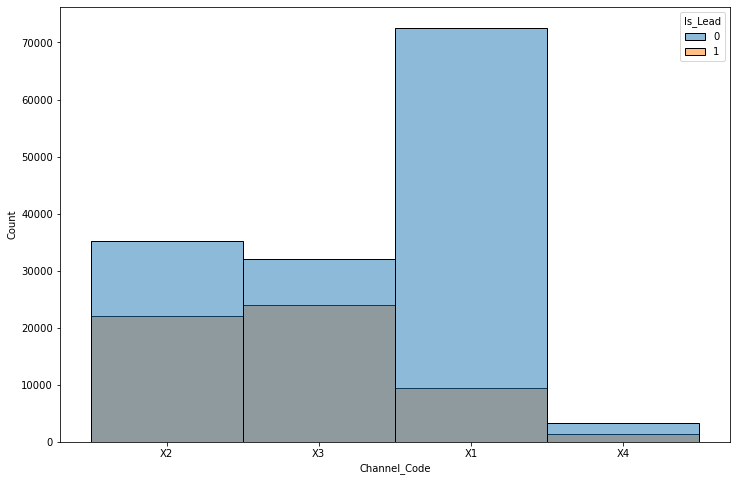

In [881]:
plt.figure(figsize=(12,8))
sns.histplot(data=preprocessed_data, x='Channel_Code', hue='Is_Lead')

##### People with X3 and X2 Channel_Code are more interested in Credit Card.

In [882]:
print("Age\t percentage of 1 per category",'\n')
list1 = preprocessed_data['Channel_Code'].unique()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['Channel_Code']==i])
    y = len(preprocessed_data[(preprocessed_data['Channel_Code']==i) & (preprocessed_data['Is_Lead']==1)])
    print(i,"->\t",y*100/x)

Age	 percentage of 1 per category 

X2 ->	 38.45240174672489
X3 ->	 42.794549826342504
X1 ->	 11.45025130532377
X4 ->	 29.656809842434708


### Vintage

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

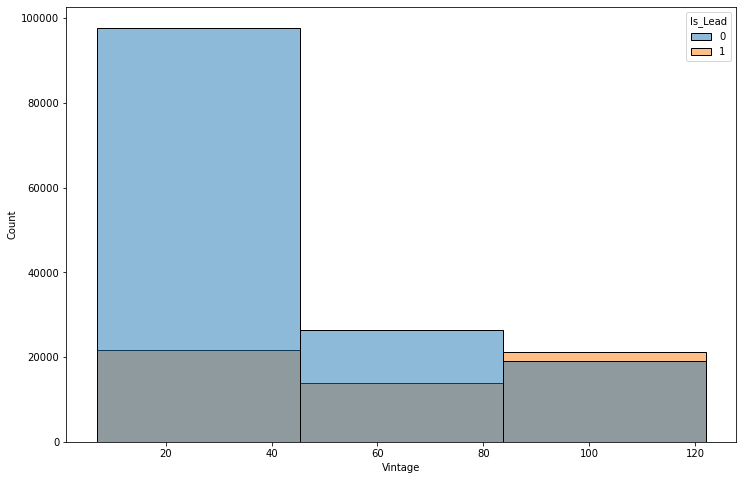

In [883]:
plt.figure(figsize=(12,8))
sns.histplot(data=preprocessed_data, x='Vintage', hue='Is_Lead', bins=3)

##### We can see people with Vintage more than 60 are more interested in Credit card.

In [884]:
print("Vintage\t percentage of 1 per category",'\n')
list1 = preprocessed_data['Age'].unique()
list1.sort()
for i in list1:
    x =len(preprocessed_data[preprocessed_data['Age']==i])
    y = len(preprocessed_data[(preprocessed_data['Age']==i) & (preprocessed_data['Is_Lead']==1)])
    print(i,"->\t",y*100/x)

Vintage	 percentage of 1 per category 

23 ->	 0.0
24 ->	 7.477906186267845
25 ->	 8.750899064972428
26 ->	 8.27078317518765
27 ->	 7.98828125
28 ->	 8.991113434396237
29 ->	 10.084033613445378
30 ->	 9.830940250115795
31 ->	 10.066006600660065
32 ->	 11.901865369018653
33 ->	 14.682539682539682
34 ->	 18.94070236039148
35 ->	 23.75
36 ->	 28.153310104529616
37 ->	 29.4054441260745
38 ->	 31.834532374100718
39 ->	 33.3454018826937
40 ->	 33.59535201640465
41 ->	 34.60346964064436
42 ->	 39.001426533523535
43 ->	 39.03771131339402
44 ->	 39.035508637236084
45 ->	 40.29380902413431
46 ->	 41.87930336168489
47 ->	 42.73632775794024
48 ->	 43.430178069353325
49 ->	 43.10247216455935
50 ->	 43.60636417206835
51 ->	 44.074593944255064
52 ->	 42.74908147827966
53 ->	 42.70687237026648
54 ->	 43.51087771942986
55 ->	 42.43331518780621
56 ->	 40.98073555166375
57 ->	 41.579419682919536
58 ->	 42.40650406504065
59 ->	 42.049092849519745
60 ->	 41.50647312671636
61 ->	 40.97872340425532
62 ->	 41

### Credit_Product

<AxesSubplot:xlabel='Credit_Product', ylabel='Count'>

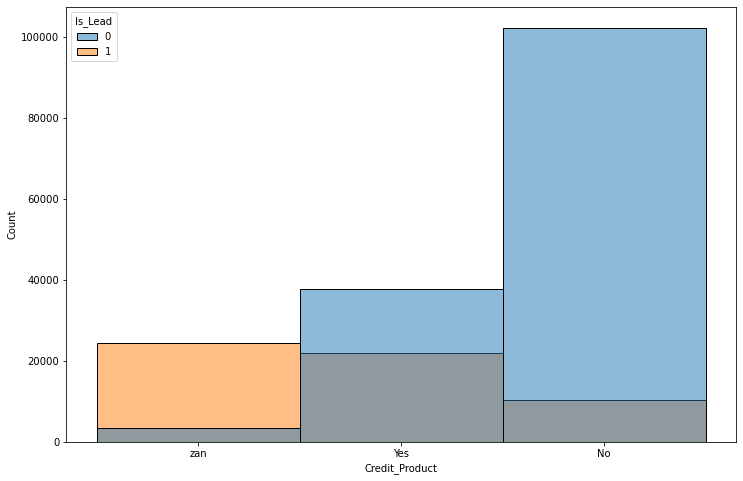

In [885]:
plt.figure(figsize=(12,8))
sns.histplot(data=preprocessed_data, x='Credit_Product', hue='Is_Lead', bins=10)

##### People who already have credit product is more interested in Credit card. People who is already in debt need more money to repay due which they are more interested in credit cards.

### Avg_Account_Balance

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Count'>

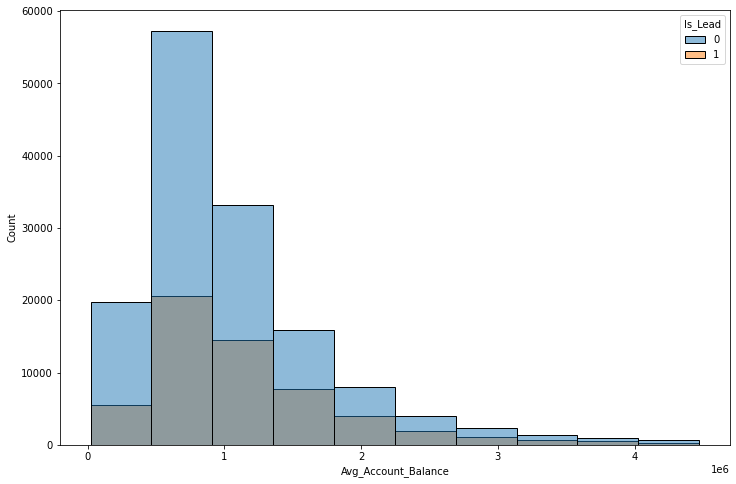

In [886]:
plt.figure(figsize=(12,8))
sns.histplot(data=preprocessed_data, x='Avg_Account_Balance', hue='Is_Lead', bins=10)

##### People with higher average account balance are more interested in credit card. Maybe people with lower average account balance donot have confidence in repaying the debt on time.

### Is_Active

<AxesSubplot:xlabel='Is_Active', ylabel='Count'>

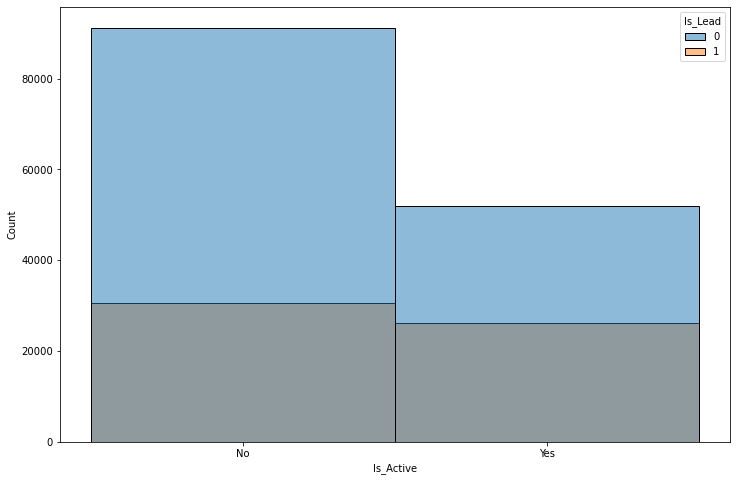

In [887]:
plt.figure(figsize=(12,8))
sns.histplot(data=preprocessed_data, x='Is_Active', hue='Is_Lead', bins=10)

##### Customers those are active in last 3 months are more interested in credit cards. Maybe those inactive customers currently don't need extra money and this maybe the reason for there inactivity.

# Data Processing

In [888]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [889]:
list1 = preprocessed_data['Region_Code'].unique()
list1.sort()
list1 = list1[1:]
dict1 = {'RG250':38.268}
for i in list1:
    x =len(preprocessed_data[preprocessed_data['Region_Code']==i])
    y = len(preprocessed_data[(preprocessed_data['Region_Code']==i) & (preprocessed_data['Is_Lead']==1)])
    per = round(y*100/x, ndigits=3)
    dict1[i] = per

In [890]:
def Processing(data):
    
    data = data.reset_index(drop=True)
    
    data['Gender'] = data['Gender'].map({'Female':1,'Male':0})
    
    
    
    df2 = pd.get_dummies(data['Channel_Code'], drop_first=True )
    data = data.join(df2)
    data = data.drop(columns=['Channel_Code'])
    
    df3 = pd.get_dummies(data['Occupation'], drop_first=True )
    data = data.join(df3)
    data = data.drop(columns=['Occupation'])
    
    
    
    
    for i in range(len(data)):
        data['Region_Code'][i] = dict1[data['Region_Code'][i]]
   
    
    df = data[['Avg_Account_Balance']]
    bin_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    df['Avg_Account_Balance'] = pd.cut(data['Avg_Account_Balance'], bins=10, precision=0, labels= bin_labels)
    data['Avg_Account_Balance'] = df[['Avg_Account_Balance']]
        
    
    data['Credit_Product'] = data['Credit_Product'].fillna(value='zan')
    data['Credit_Product'] = data['Credit_Product'].map({'Yes':1,'No':0,'zan':0.5})

    
    data['Is_Active'] = data['Is_Active'].map({'Yes':1,'No':0})
    

    
    return(data)

In [891]:
preprocessed_data = Processing(preprocessed_data)

<ipython-input-890-02019d8b9153>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Region_Code'][i] = dict1[data['Region_Code'][i]]
<ipython-input-890-02019d8b9153>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg_Account_Balance'] = pd.cut(data['Avg_Account_Balance'], bins=10, precision=0, labels= bin_labels)


In [892]:
preprocessed_data

,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,X2,X3,X4,Other,Salaried,Self_Employed
0,0,59,23.262,98,0.5,2,0,1,1,0,0,0,1,0
1,0,31,35.453,14,0.5,4,0,1,1,0,0,0,0,1
2,0,42,28.044,98,0.5,3,1,1,1,0,0,0,0,1
3,1,51,28.044,62,0.5,2,1,1,0,1,0,1,0,0
4,1,39,35.607,20,1.0,3,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,47,35.46,19,1.0,2,0,0,0,1,0,0,0,0
199996,0,33,35.453,27,0.0,2,0,0,0,0,0,0,1,0
199997,0,62,17.367,55,0.0,2,0,0,0,1,0,1,0,0
199998,1,32,35.607,31,0.0,3,0,0,0,0,0,0,1,0


In [893]:

scaler.fit(preprocessed_data[['Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance','Region_Code']])
preprocessed_data[['Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance','Region_Code']] = scaler.transform(preprocessed_data[['Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance','Region_Code']])

In [894]:
from sklearn.feature_selection import f_classif

In [895]:
preprocessed_data.head()

,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,X2,X3,X4,Other,Salaried,Self_Employed
0,0,1.015993,-0.877867,1.602684,0.298130,-0.554201,0,1,1,0,0,0,1,0
1,0,-0.886444,1.131812,-1.038747,0.298130,0.705862,0,1,1,0,0,0,0,1
2,0,-0.139058,-0.089557,1.602684,0.298130,0.075831,1,1,1,0,0,0,0,1
3,1,0.472439,-0.089557,0.470642,0.298130,-0.554201,1,1,0,1,0,1,0,0
4,1,-0.342891,1.157199,-0.850073,1.422217,0.075831,0,1,0,0,0,0,0,1


In [896]:
preprocessed_data.columns

Index(['Gender', 'Age', 'Region_Code', 'Vintage', 'Credit_Product',
       'Avg_Account_Balance', 'Is_Active', 'Is_Lead', 'X2', 'X3', 'X4',
       'Other', 'Salaried', 'Self_Employed'],
      dtype='object')

In [897]:
x = preprocessed_data[['Gender', 'Age', 'Region_Code', 'Vintage', 'Credit_Product',
       'Avg_Account_Balance', 'Is_Active', 'X2', 'X3', 'X4',
       'Other', 'Salaried', 'Self_Employed']]
y = preprocessed_data[['Is_Lead']]

In [898]:
data = f_classif(x, y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [899]:
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [900]:
df1 = pd.DataFrame()
df1['Columns'] = x.columns
df1['F feature'] = data[0]
df1['P Value'] = data[1].round(4)

In [901]:
df1

,Columns,F feature,P Value
0,Gender,1133.723831,0.000
1,Age,12969.887406,0.000
2,Region_Code,3326.678077,0.000
3,Vintage,19514.507074,0.000
4,Credit_Product,24776.880281,0.000
5,Avg_Account_Balance,897.621236,0.000
6,Is_Active,1636.253952,0.000
7,X2,4066.562589,0.000
8,X3,8282.565933,0.000
9,X4,3.681309,0.055


##### Removing features will p_value greater than 0.05

<AxesSubplot:>

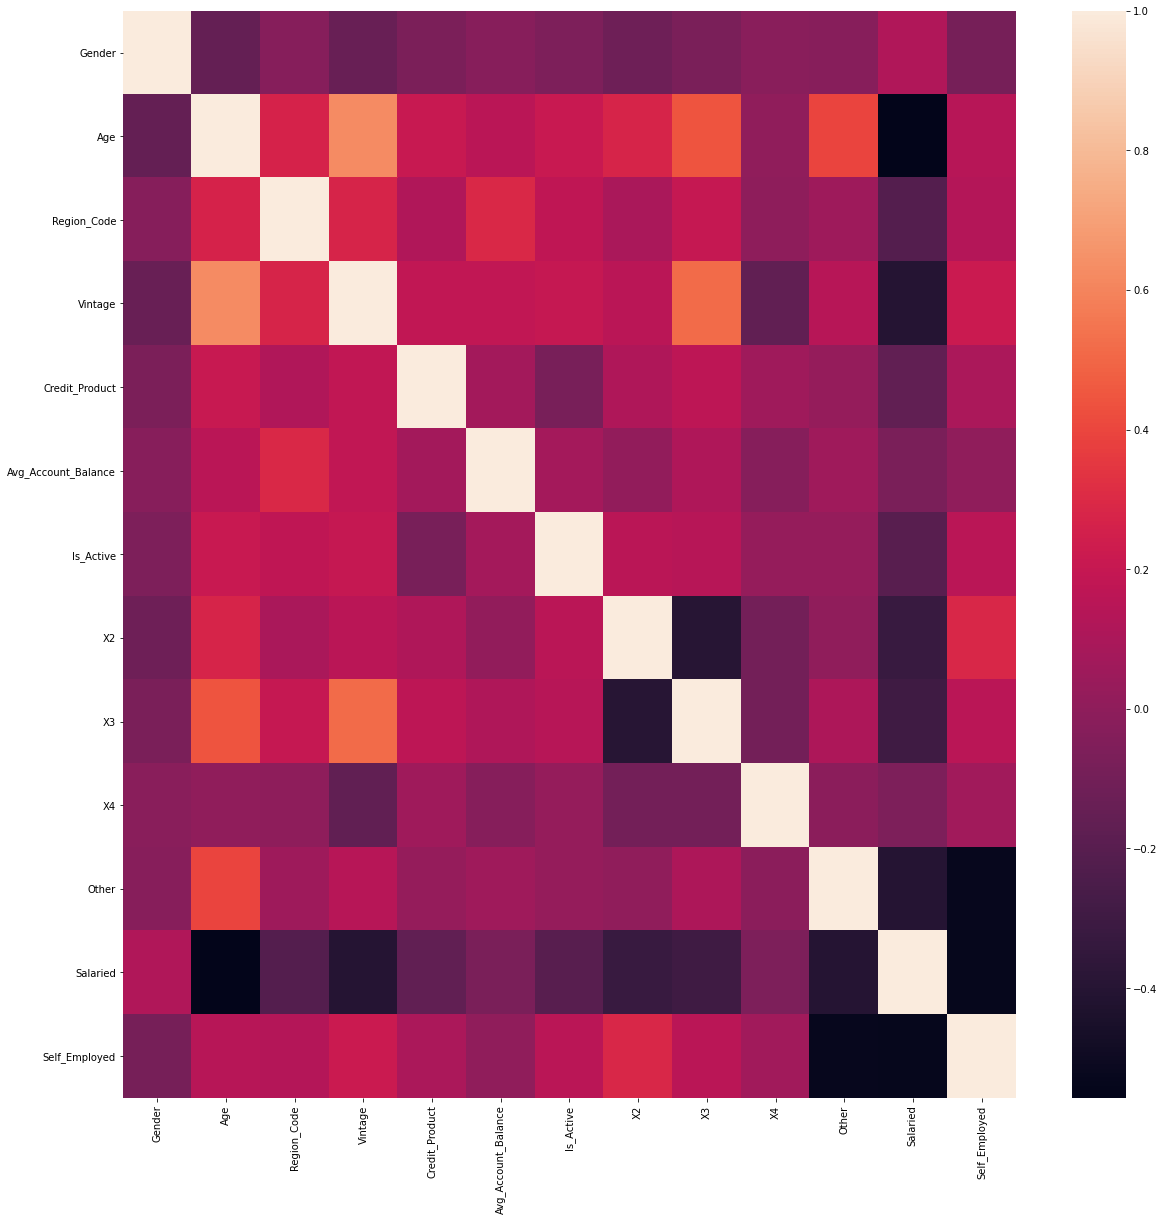

In [902]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr())

# Split train test

In [903]:
from sklearn.model_selection import train_test_split

In [904]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=360)

In [905]:
x_train

,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,X2,X3,X4,Other,Salaried,Self_Employed
58738,1,0.880105,-0.475470,-1.070193,-0.825956,0.075831,1,1,0,0,0,0,1
99400,1,0.404495,-1.401759,1.225337,1.422217,0.075831,0,0,1,0,0,0,1
185149,0,0.880105,1.132966,2.168705,-0.825956,-0.554201,0,1,0,0,0,0,1
1700,0,0.132718,-0.925179,0.502088,1.422217,-0.554201,0,1,0,0,0,0,1
176456,1,-1.090277,1.157199,-0.881519,-0.825956,1.965925,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170207,1,-1.158221,-0.877867,-0.661400,-0.825956,0.075831,0,0,0,0,0,1,0
192802,1,-0.954389,-0.778133,-0.441280,-0.825956,-1.184233,0,0,0,0,0,1,0
93704,0,-0.614668,-0.410189,-0.504172,-0.825956,0.075831,0,0,0,0,0,1,0
44733,0,-1.158221,-0.034827,-0.850073,-0.825956,-0.554201,0,0,0,0,0,1,0


# Model

## ANN

In [906]:
import tensorflow
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [907]:
model = Sequential()


model.add(Dense(35,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(35,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(35,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(35,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(35,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(35,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(35,activation='relu'))
#model.add(Dropout(0.5))








model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'Adam', loss='mse')

In [908]:
earlystopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [909]:
model.fit(x_train, y_train, batch_size=128, epochs=400, callbacks = earlystopping, validation_split=0.2)

Epoch 1/400
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1447 - val_loss: 0.1189
Epoch 2/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1176 - val_loss: 0.1188
Epoch 3/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1153 - val_loss: 0.1177
Epoch 4/400
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1158 - val_loss: 0.1176
Epoch 5/400
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1151 - val_loss: 0.1176
Epoch 6/400
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1156 - val_loss: 0.1173
Epoch 7/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1153 - val_loss: 0.1183
Epoch 8/400
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1145 - val_loss: 0.1175
Epoch 9/400
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1145 - val_loss: 0.1172
Epoch 10/400
1000/1000 [==============================] - 3s 3ms/step - l

In [910]:
pred_test3 = model.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_test3)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8757842473330582

# Testing

In [911]:
test_data = pd.read_csv('test_mSzZ8RL.csv')

In [912]:
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [913]:
test_data.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [914]:
test_data = Processing(test_data)

test_data[['Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance','Region_Code']] = scaler.fit_transform(test_data[['Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance','Region_Code']])


<ipython-input-890-02019d8b9153>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Region_Code'][i] = dict1[data['Region_Code'][i]]
<ipython-input-890-02019d8b9153>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg_Account_Balance'] = pd.cut(data['Avg_Account_Balance'], bins=10, precision=0, labels= bin_labels)


In [915]:
test_data

,ID,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,X2,X3,X4,Other,Salaried,Self_Employed
0,VBENBARO,0,-0.999878,-0.471887,-0.676804,1.443192,-0.648948,0,0,0,0,1,0,0
1,CCMEWNKY,0,-0.058563,1.136611,0.066841,0.323495,-0.648948,0,1,0,0,1,0,0
2,VK3KGA9M,0,-0.865404,-1.766499,-1.017641,-0.796202,-0.648948,0,0,0,0,0,1,0
3,TT8RPZVC,0,-0.999878,-0.313296,-0.428922,-0.796202,-0.648948,0,0,0,0,1,0,0
4,SHQZEYTZ,1,-0.999878,-1.766499,-0.862715,-0.796202,-0.648948,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,0,0.546567,1.136611,1.213293,1.443192,3.673417,1,1,0,0,0,1,0
105308,CWQ72DWS,0,0.748278,-0.085960,1.213293,1.443192,0.431643,0,1,0,0,1,0,0
105309,HDESC8GU,0,-0.596457,-0.471887,-0.986656,-0.796202,0.431643,0,0,0,1,0,1,0
105310,2PW4SFCA,0,0.613804,-0.471887,1.430189,-0.796202,-0.648948,1,0,1,0,1,0,0


In [916]:
sub = pd.DataFrame()

sub['ID'] = test_data['ID']
test_data = test_data.drop(columns=['ID'])

In [917]:
test_data.head()

,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,X2,X3,X4,Other,Salaried,Self_Employed
0,0,-0.999878,-0.471887,-0.676804,1.443192,-0.648948,0,0,0,0,1,0,0
1,0,-0.058563,1.136611,0.066841,0.323495,-0.648948,0,1,0,0,1,0,0
2,0,-0.865404,-1.766499,-1.017641,-0.796202,-0.648948,0,0,0,0,0,1,0
3,0,-0.999878,-0.313296,-0.428922,-0.796202,-0.648948,0,0,0,0,1,0,0
4,1,-0.999878,-1.766499,-0.862715,-0.796202,-0.648948,0,0,0,0,1,0,0


In [918]:
test_data.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
X2                     0
X3                     0
X4                     0
Other                  0
Salaried               0
Self_Employed          0
dtype: int64

In [919]:
f_test = test_data[['Gender', 'Age', 'Region_Code', 'Vintage', 'Credit_Product',
       'Avg_Account_Balance', 'Is_Active', 'X2', 'X3', 'X4',
       'Other', 'Salaried', 'Self_Employed']]

In [920]:
test_pred = model.predict(f_test)

In [921]:
sample_sub = pd.read_csv('sample_submission_eyYijxG.csv')
sample_sub

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,0
105308,CWQ72DWS,0
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [922]:
sub['Is_Lead'] = test_pred

In [923]:
sub

,ID,Is_Lead
0,VBENBARO,0.085153
1,CCMEWNKY,0.911862
2,VK3KGA9M,0.063180
3,TT8RPZVC,0.030218
4,SHQZEYTZ,0.029278
...,...,...
105307,DBENJOYI,0.968692
105308,CWQ72DWS,0.555949
105309,HDESC8GU,0.092530
105310,2PW4SFCA,0.286374


In [924]:
sub.to_csv('Prediction_ANN18.csv',index=False)